# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. 

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

## A.

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import code.auxiliary_functions as aux
from code.utils import download_data

import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)


2023-05-02 13:07:32.607882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!pip3 freeze > ../requirements.txt

In [3]:
# download data for the lesson (this can take a few minutes)
download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

In [4]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'  

ROI = cm.load(input_tif_file_path)

In [5]:
ROI.shape

(500, 300, 400)

The file has 500 frames and is 300x400 in size. Now lets generate random coordinates for N neurons. Then put all 500 pixel values for that pixel in an array and plot it.

In [6]:
np.random.seed(17)

def create_coordinates(n):
    coordinates = np.random.randint(low=0, high=(300, 400), size=(N, 2))
    return coordinates

N = 10  # number of coordinates
coordinates = create_coordinates(N)    

Text(0, 0.5, 'activity')

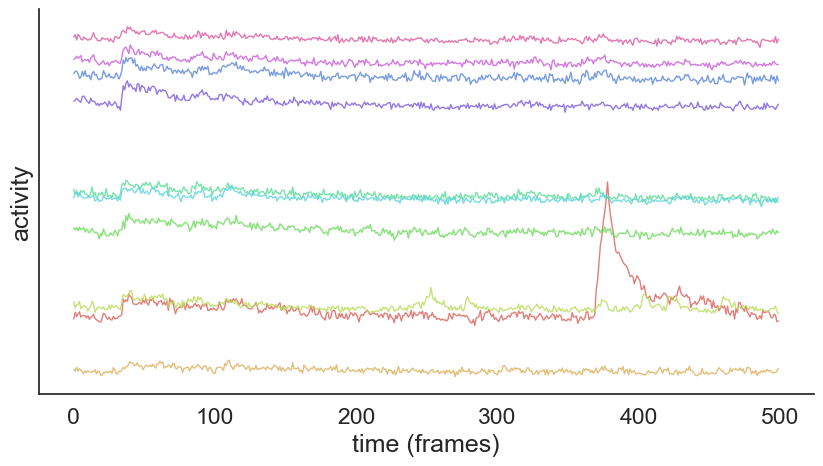

In [7]:
#plot temporal traces

colors = sns.color_palette("hls",N)
num_traces = len(coordinates)
offsets = np.linspace(-num_traces/2, num_traces/2, num_traces)

activities = np.zeros((N,500), int)      #create list with all pixel values for the next question (B)
figure, axes = plt.subplots(1, figsize=(10, 5))

i=0
for pixel in coordinates:
    activity = ROI[:,pixel[0],pixel[1]]
    activities[i,:] = activity
    # add the offset value to the y-coordinate of each trace
    y = activity + 100*offsets[i]
    axes.plot(y,c=colors[i], linewidth=1, alpha=0.8)
    i+=1

axes.set_xlabel('time (frames)')
axes.set_yticks([])
sns.despine()
axes.set_ylabel('activity')


It is evident that one pixel is quite active, indicating a calcium transient dynamic. Also, it took quite a few of random seeds (18) to get an active pixel.

## B.

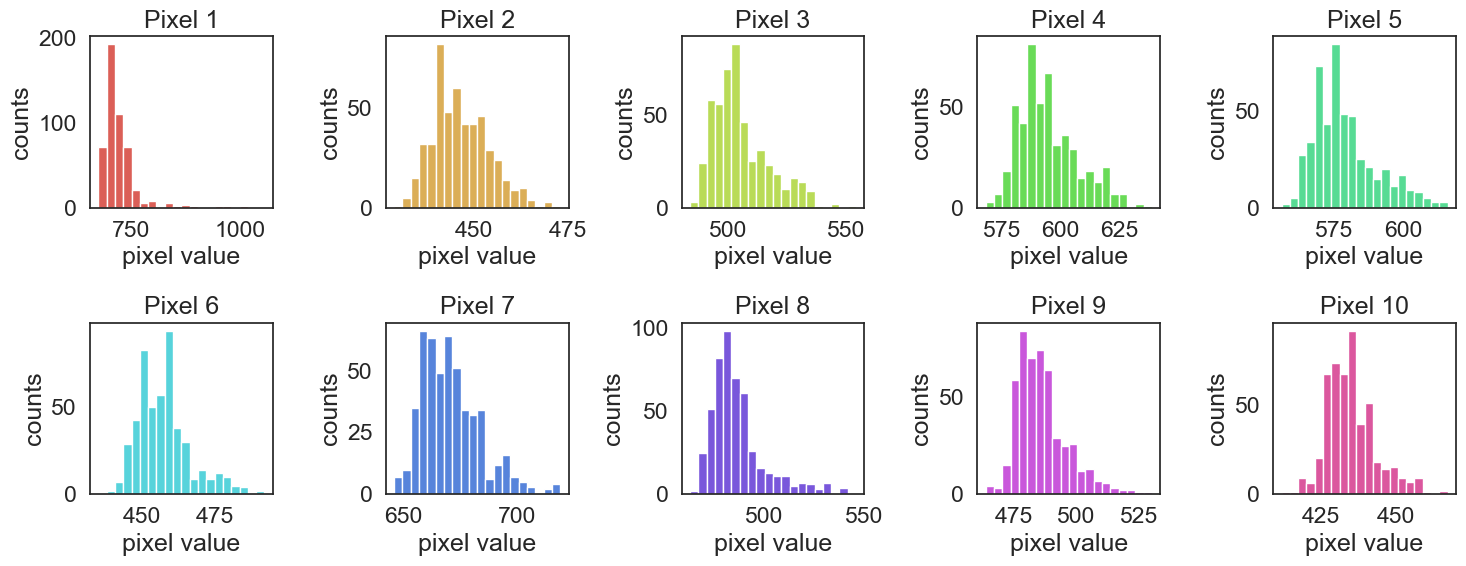

In [8]:
# plot the histograms
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i in range(N):
    axs[i].hist(activities[i,:],bins=20, color=colors[i])
    axs[i].set_title(f'Pixel {i+1}')
    axs[i].set_xlabel('pixel value')
    axs[i].set_ylabel('counts')
        
plt.tight_layout()
plt.show()

It seems that pixel 1 corresponds with an actual neuron, since the distribution is more peaked and it is at a higher pixel value. The other distributions are more broad, indicating just noise. However, it can be hard to define the difference between the influence of a neuron in the neighborhood on the pixel, and the pixel being the neuron itself. It is therefore useful to do a segmentation of the neurons beforehand.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.